In [1]:
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from umap import UMAP

from scquint.data import add_gene_annotation, group_introns, filter_min_cells_per_feature, filter_min_cells_per_intron_group, calculate_PSI
from scquint.differential_splicing import run_differential_splicing, run_differential_splicing_for_each_group, find_marker_introns, mask_PSI
from scquint.dimensionality_reduction.pca import run_pca

In [6]:
adata = anndata.read_h5ad("/external/rprshnas01/netdata_kcni/stlab/Nuo/output/SJ/raw/adata_spl.h5ad")

In [3]:
adata = filter_min_cells_per_feature(adata, 100)
adata = filter_min_cells_per_intron_group(adata, 100)
adata = adata[adata.obs.subclass.isin(['Vip', 'Sst', 'Pvalb', 'Sncg', 'Lamp5'])]

filter_min_cells_per_feature
filter_singletons
filter_min_cells_per_intron_group
filter_singletons


In [7]:
pattern = r"Kcnc1"

In [19]:
Kcnc1 = adata[:, adata.var[adata.var.index.str.contains(pattern)].index]

In [20]:
Kcnc1.layers["PSI_raw"] = calculate_PSI(Kcnc1)

/external/rprshnas01/kcni/nxu/tools/scquint/scquint/data.py:209: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


In [21]:
Kcnc1.layers["PSI_raw"]

array([[ 0.,  1., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  1., nan, ..., nan, nan, nan],
       ...,
       [ 0.,  1., nan, ..., nan, nan, nan],
       [ 0.,  1., nan, ..., nan, nan, nan],
       [ 0.,  1., nan, ..., nan, nan, nan]])

In [27]:
a = Kcnc1.obs.markers.value_counts()

In [30]:
Kcnc1.layers['PSI_raw'].shape

(4353, 22)

/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:364: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


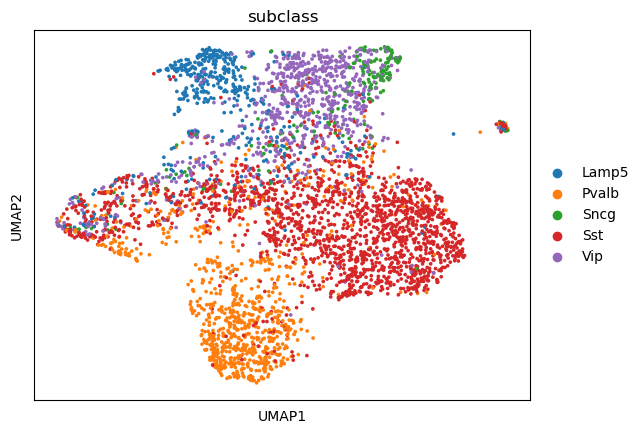

In [5]:
adata.obsm["X_umap"] = UMAP(n_components=2).fit_transform(run_pca(adata, 10))
sc.pl.umap(adata, color='subclass')

In [53]:
groups_test = adata.obs.subclass.value_counts().head(5).index.tolist()

In [54]:
groups_test

['Sst', 'Pvalb', 'Vip', 'Lamp5', 'Sncg']

In [9]:
diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata, "subclass", groups=groups_test, subset_to_groups=True, min_cells_per_intron_group=50, min_total_cells_per_intron=50, n_jobs=-1)

Sst
sample sizes:  1823 2397
(4220, 12761)
filter_min_cells_per_feature
filter_singletons
(4220, 12759)
filter_min_global_proportion
filter_singletons
(4220, 12757)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4220, 12721)
Number of intron groups:  5949
Number of introns:  12721


100%|██████████| 5949/5949 [02:24<00:00, 41.07it/s] 


Pvalb
sample sizes:  888 3332
(4220, 12761)
filter_min_cells_per_feature
filter_singletons
(4220, 12759)
filter_min_global_proportion
filter_singletons
(4220, 12757)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4220, 12438)
Number of intron groups:  5810
Number of introns:  12438


100%|██████████| 5810/5810 [00:55<00:00, 104.79it/s]


Vip
sample sizes:  797 3423
(4220, 12761)
filter_min_cells_per_feature
filter_singletons
(4220, 12759)
filter_min_global_proportion
filter_singletons
(4220, 12757)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4220, 11813)
Number of intron groups:  5503
Number of introns:  11813


100%|██████████| 5503/5503 [00:54<00:00, 100.58it/s]


Lamp5
sample sizes:  477 3743
(4220, 12761)
filter_min_cells_per_feature
filter_singletons
(4220, 12759)
filter_min_global_proportion
filter_singletons
(4220, 12757)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4220, 10978)
Number of intron groups:  5098
Number of introns:  10978


100%|██████████| 5098/5098 [00:51<00:00, 99.40it/s] 


Sncg
sample sizes:  235 3985
(4220, 12761)
filter_min_cells_per_feature
filter_singletons
(4220, 12759)
filter_min_global_proportion
filter_singletons
(4220, 12757)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(4220, 7823)
Number of intron groups:  3583
Number of introns:  7823


100%|██████████| 3583/3583 [00:44<00:00, 80.71it/s]


In [39]:
import pickle

In [16]:
#Pickling the two objects
with open('/nethome/kcni/nxu/scQuint/diff_spl_intron_groups.pickle', 'wb') as f:
    pickle.dump(diff_spl_intron_groups, f, pickle.HIGHEST_PROTOCOL)
with open('/nethome/kcni/nxu/scQuint/diff_spl_introns.pickle', 'wb') as f:
    pickle.dump(diff_spl_introns, f, pickle.HIGHEST_PROTOCOL)

In [40]:
with open('/nethome/kcni/nxu/scQuint/diff_spl_intron_groups.pickle', 'rb') as f:
    diff_spl_intron_groups = pickle.load(f)
with open('/nethome/kcni/nxu/scQuint/diff_spl_introns.pickle', 'rb') as f:
    diff_spl_introns = pickle.load(f)

In [12]:
sig_diff_spl_intron_groups = diff_spl_intron_groups.query('p_value_adj < 0.05 and max_abs_delta_psi > 0.05')
sig_diff_spl_intron_groups.shape

(2972, 12)

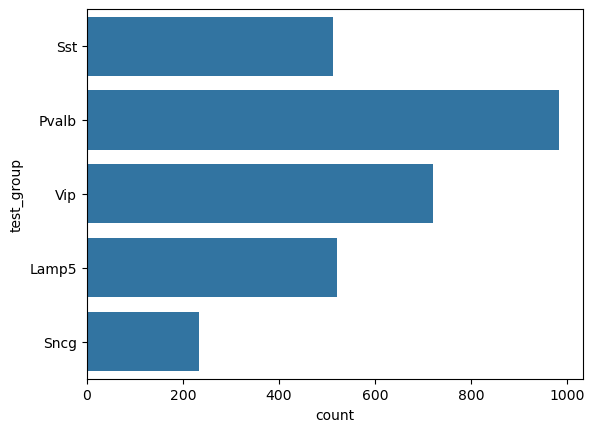

In [13]:
sns.countplot(sig_diff_spl_intron_groups, y="test_group", color="C0", order=groups_test);

In [41]:
adata.layers["PSI_raw"] = calculate_PSI(adata)

/external/rprshnas01/kcni/nxu/scQuint/scquint/scquint/data.py:209: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


In [63]:
adata.layers['PSI_raw'].shape

(4434, 357878)

In [55]:
marker_introns = find_marker_introns(
    diff_spl_intron_groups, diff_spl_introns, n=10, min_delta_psi=0.3,
)
marker_introns = {c: marker_introns[c] for c in groups_test} # just reordering
marker_introns

{'Sst': ['Nrxn1_17:90905058-90928292',
  'Frmd4b_6:97400486-97464553',
  'Hdac9_12:34578345-34877635',
  'Arhgap6_X:167579808-168003193',
  'Prkn_17:11683888-11711565',
  'Tmcc3_10:94148065-94266384',
  'Kcnd3_3:105572863-105575395',
  'Pde4b_4:102052272-102344407',
  'Etl4_2:20718260-20748269',
  'Lmo2_2:103800711-103800837'],
 'Pvalb': ['Sox5_6:144100950-144380150',
  'Wbp1l_19:46612019-46632791',
  'Snap91_9:86674790-86680590',
  'Ablim1_19:57039667-57047516',
  'Ank3_10:69542756-69644245',
  'Rnf144b_13:47347597-47360835',
  'Ptk2_15:73154085-73155115',
  'Cacna1d_14:29850756-29851745',
  'Plch2_4:155071474-155073579',
  'Kcnt1_2:25754075-25778080'],
 'Vip': ['Pde4d_13:109253615-109876920',
  'Nrxn3_12:89315220-89469787',
  'Pcdh15_10:73658092-73782859',
  'Lrrc7_3:157876394-157880739',
  'Arhgef3_14:27058227-27084746',
  'Dock9_14:121918876-122034901',
  'Ankrd28_14:31500963-31552283',
  'B230209E15Rik_7:61185237-61195748',
  'Nbea_3:55899936-55901468',
  'Ralyl_3:14011593-1410477

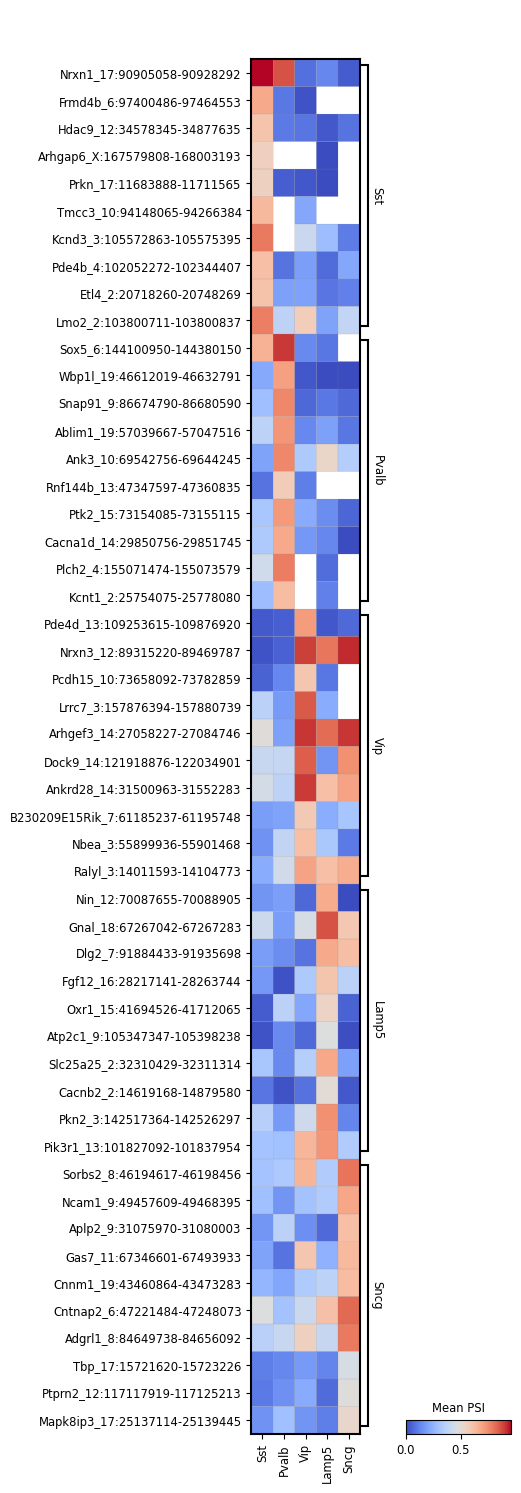

In [66]:
sc.pl.matrixplot(
    # we want to mask introns with less than min_cells=10 cells with defined PSI
    # to reduce noise in the heatmap visualization
    mask_PSI(
        adata[adata.obs.subclass.isin(groups_test)],
        marker_introns, "subclass", min_cells=20
    ),
    marker_introns, 'subclass', cmap='coolwarm', categories_order=groups_test,
    swap_axes=True, layer="PSI_raw_masked", colorbar_title="Mean PSI",
)

/nethome/kcni/nxu/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:2332: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


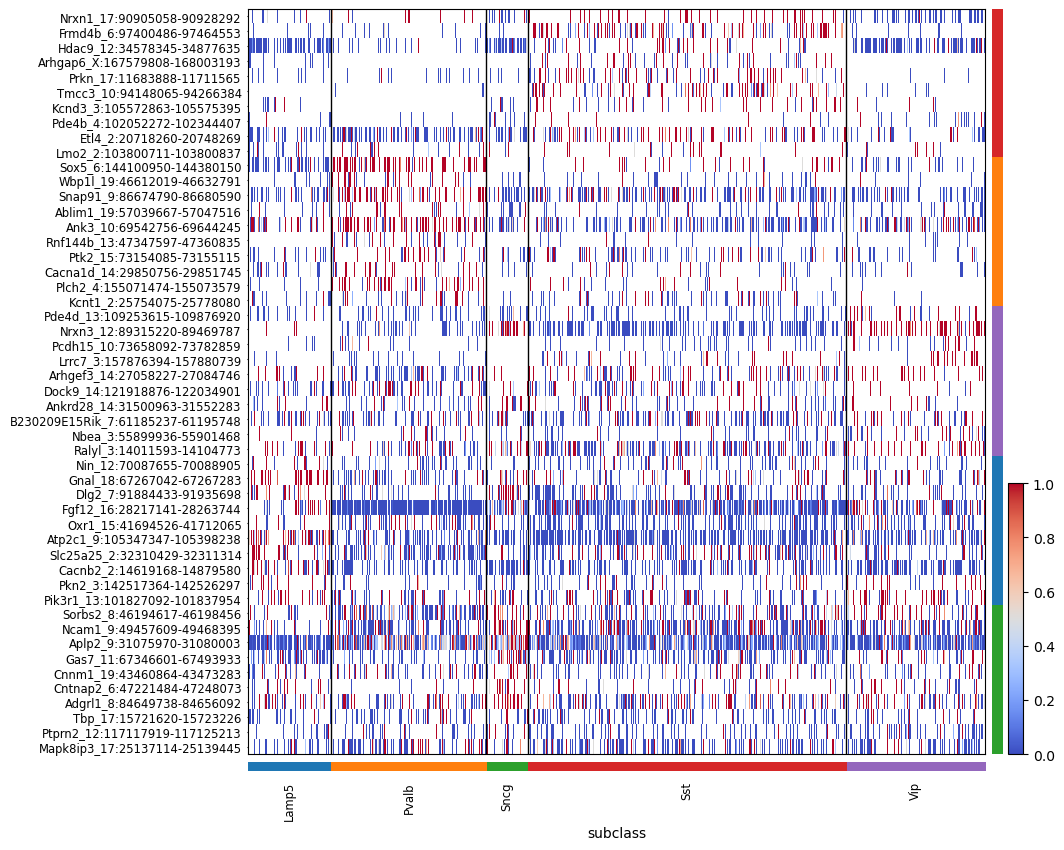

In [74]:
sc.pl.heatmap(
    mask_PSI(
        adata[adata.obs.subclass.isin(groups_test)],
        marker_introns, "subclass", min_cells=10
    ),
    marker_introns,
    'subclass',
    cmap='coolwarm',
    # categories_order=groups_test,  # not working for some reason
    swap_axes=True,
    layer="PSI_raw_masked",
    vmin=0,
    vmax=1,
    figsize=(10, 10),
)